In [29]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from tqdm import tqdm

## PartA

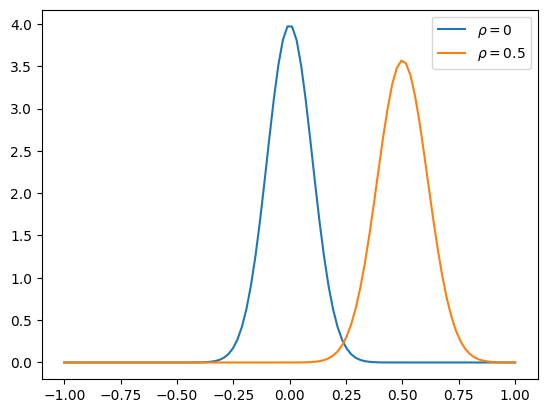

In [6]:
def distribution(rho: float, population_size: int):
    return sts.norm(rho, ((1 + rho**2) / population_size) ** 0.5)


x = np.linspace(-1, 1, 100)
plt.plot(x, distribution(0, 100).pdf(x), label=r"$\rho=0$")
plt.plot(x, distribution(0.5, 100).pdf(x), label=r"$\rho=0.5$")
plt.legend()
plt.savefig("../static/task3/distributions.png")

## PartB

Proof of criterion 

In [26]:
cut_off = distribution(0, 100).ppf(0.975)


def generate_population(n_population: int):
    for _ in range(n_population):
        yield abs((sts.norm.rvs(size=100) @ sts.norm.rvs(size=100)) / 100) > cut_off

In [27]:
sum(generate_population(10_000)) / 10_000

np.float64(0.0495)

## PartC





Sampling

In [93]:
def generate_population(n_population: int, rho: float, size: int):
    dist = sts.multivariate_normal([0, 0], [[1, rho], [rho, 1]])
    cut_off = distribution(0, size).ppf(0.975)
    for _ in range(n_population):
        samples = dist.rvs(size=size)
        yield abs((samples[:, 0] @ samples[:, 1]) / size) > cut_off

In [117]:
n_population = 1_000
size = 100

rho_power_estimation = (
    lambda rho: sum(generate_population(n_population, rho, size)) / n_population
)
rhos = np.linspace(0.01, 0.95, 20)

power = [rho_power_estimation(rho) for rho in rhos]

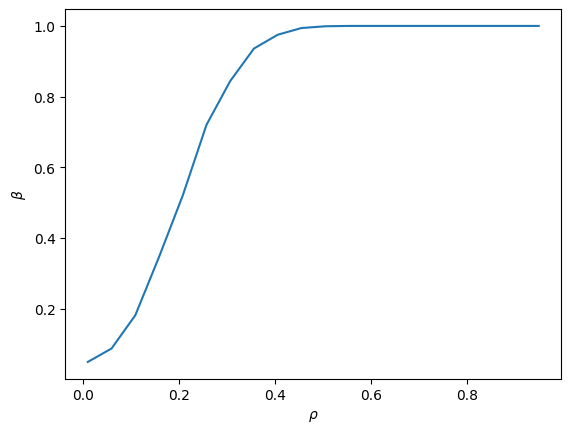

In [120]:
plt.plot(rhos, power)
plt.ylabel(r"$\beta$")
plt.xlabel(r"$\rho$")
plt.savefig("../static/task3/power_n_100.png")

Different sample size

In [121]:
n_population = 1_000

size_to_power = []
rhos = np.linspace(0.01, 0.95, 10)
sizes = [20, 100, 200, 500, 1000]
for size in sizes:
    rho_power_estimation = (
        lambda rho: sum(generate_population(n_population, rho, size)) / n_population
    )
    size_to_power.append([rho_power_estimation(rho) for rho in rhos])

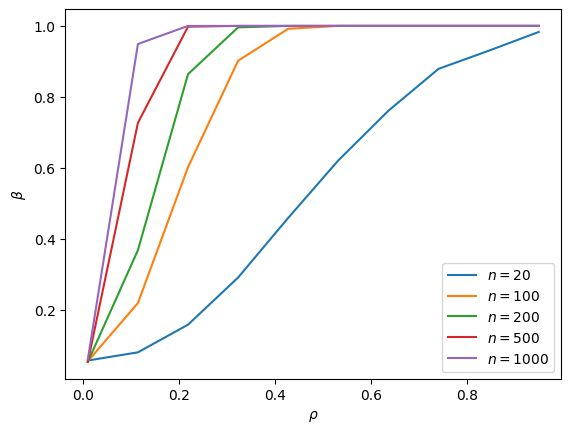

In [123]:
plt.plot(
    rhos, np.array(size_to_power).T, label=[r"$n={}$".format(size) for size in sizes]
)
plt.ylabel(r"$\beta$")
plt.xlabel(r"$\rho$")
plt.legend()
plt.savefig("../static/task3/power_n_dep.png")

Analytical inference

In [127]:
analytical_size_to_power = []
for size in sizes:
    cut_off = distribution(0, size).ppf(0.975)
    analytical_size_to_power.append(distribution(rhos, size).sf(cut_off))

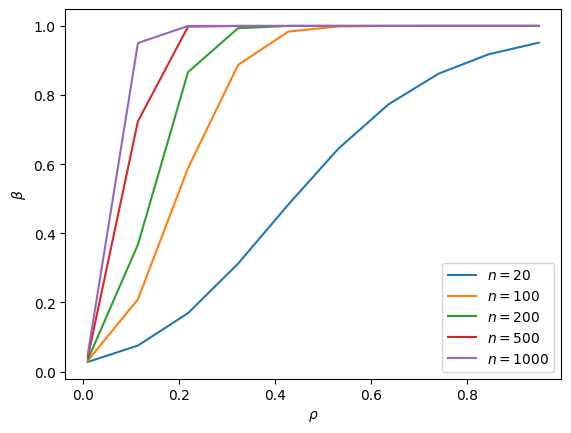

In [129]:
plt.plot(
    rhos,
    np.array(analytical_size_to_power).T,
    label=[r"$n={}$".format(size) for size in sizes],
)
plt.ylabel(r"$\beta$")
plt.xlabel(r"$\rho$")
plt.legend()
plt.savefig("../static/task3/analytical_power_n_dep.png")

$T(\mathbf{Z})= \frac{1}{2n}\sum_{i=1}^n (x_i -y_i)^2$

Proof of A/B

In [168]:
left_cut_off = sts.chi2(100).ppf(0.025) / 100
right_cut_off = sts.chi2(100).ppf(0.975) / 100
print(left_cut_off, right_cut_off)


def generate_population(n_population: int):
    for _ in range(n_population):
        statics = (
            np.sum((sts.norm.rvs(size=100) - sts.norm.rvs(size=100)) ** 2) / 2 / 100
        )
        yield any([left_cut_off > statics, statics > right_cut_off])

0.7422192747492373 1.2956119718583659


In [169]:
sum(generate_population(10_000)) / 10_000

0.0529

Power 

In [185]:
chi_analytical_size_to_power = [
    sts.chi2(size).cdf(sts.chi2(size).ppf(0.025) / (1 - rhos)) for size in sizes
]

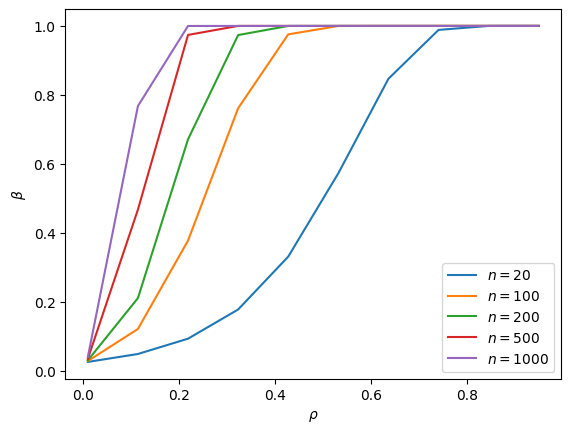

In [187]:
plt.plot(
    rhos,
    np.array(chi_analytical_size_to_power).T,
    label=[r"$n={}$".format(size) for size in sizes],
)
plt.ylabel(r"$\beta$")
plt.xlabel(r"$\rho$")
plt.legend()
plt.savefig("../static/task3/chi_analytical_power_n_dep.png")